##SQL


In [ ]:
#importing libraries
import sqlite3
import pandas as pd
from io import StringIO
from google.colab import files


In [ ]:
#connect to SQLite database

conn = sqlite3.connect('company_data.db')
cursor = conn.cursor()
print("Connected to SQLite database")

Connected to SQLite database


In [ ]:
#reading files
try:
  df_master = pd.read_csv("/content/Employee_Master.csv", encoding='utf-8')
  df_performance = pd.read_csv("/content/Employee_Performance.csv", encoding='utf-8')
except UnicodeDecodeError:
  df_master = pd.read_csv("/content/Employee_Master.csv", encoding='latin-1')
  df_performance = pd.read_csv("/content/Employee_Performance.csv", encoding='latin-1')

In [ ]:
#strore as tables in sqlite3

df_master.to_sql('employee_master', conn, if_exists='replace', index=False)
df_performance.to_sql('employee_performance', conn, if_exists='replace', index=False)
print("Tables loaded into SQLite.")

Tables loaded into SQLite.


In [ ]:
print("Total number of employees: ")

display(pd.read_sql_query("SELECT COUNT(*) AS total_employees FROM employee_master", conn))

Total number of employees: 


,total_employees
0,1000


In [ ]:
display(pd.read_sql_query("SELECT * FROM employee_master LIMIT 5", conn))

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55.0,4/8/2016,"$141,604",0.15,United States,Seattle,10/16/2021
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59.0,11/29/1997,"$99,975",0.00,China,Chongqing,None
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50.0,10/26/2006,"$163,099",0.20,United States,Chicago,None
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26.0,9/27/2019,"$84,913",0.07,United States,Chicago,None
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55.0,11/20/1995,"$95,409",0.00,United States,Phoenix,None


In [ ]:
display(pd.read_sql_query("SELECT Age FROM employee_master WHERE City IS NULL", conn))

,Age
0,50.0
1,37.0


In [ ]:
print("\n Employee count per Department:")
display(pd.read_sql("SELECT Department, COUNT(*) AS count FROM employee_master GROUP BY Department" , conn))


 Employee count per Department:


,Department,count
0,None,2
1,Accounting,96
2,Engineering,158
3,Finance,120
4,Human Resources,124
5,IT,240
6,Marketing,120
7,Sales,140


In [ ]:
print ("\n number of NULL values in Exit Date")
display(pd.read_sql("SELECT COUNT(*) FROM employee_master WHERE \"Exit Date\" IS NULL", conn))


 number of NULL values in Exit Date


,COUNT(*)
0,915


In [ ]:
display(pd.read_sql("SELECT * FROM employee_performance LIMIT 5 " , conn))

,PK,EEID,EmploymentRating,DaysOfAbsence,EducationLevel,CertificationsEarned
0,1,E03247,7,16,Bachelor's,0
1,2,E00586,5,16,Master's,1
2,3,E02966,10,16,Bachelor's,1
3,4,E02802,7,16,Bachelor's,2
4,5,E02706,7,16,Master's,2


In [ ]:
#Join tables
merge_query = """
CREATE TABLE Employee_Profile AS
SELECT employee_master.*, employee_performance.EmploymentRating, employee_performance.DaysOfAbsence,
employee_performance.EducationLevel, employee_performance.CertificationsEarned
FROM employee_master
JOIN employee_performance ON employee_master.EEID = employee_performance.EEID
"""
cursor.execute(merge_query)
conn.commit()
print("Employee_Profile table created.")


Employee_Profile table created.


In [ ]:
#merged table (Employee Profile)
display(pd.read_sql("SELECT * FROM Employee_Profile LIMIT 5", conn))


,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,EmploymentRating,DaysOfAbsence,EducationLevel,CertificationsEarned
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55.0,4/8/2016,"$141,604",0.15,United States,Seattle,10/16/2021,5,2,Master's,2
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59.0,11/29/1997,"$99,975",0.00,China,Chongqing,None,10,8,Bachelor's,2
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50.0,10/26/2006,"$163,099",0.20,United States,Chicago,None,5,4,Bachelor's,2
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26.0,9/27/2019,"$84,913",0.07,United States,Chicago,None,8,3,Bachelor's,2
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55.0,11/20/1995,"$95,409",0.00,United States,Phoenix,None,5,12,Bachelor's,0


In [ ]:
# 10 Insert statements

insert_statements = """
INSERT INTO  Employee_Profile (EEID, \"Job Title\", Department, Gender)
VAlUES
('E02001', 'Analyst', 'IT', 'Male'),
('E02002', 'Analyst', 'IT', 'Female'),
('E02003', 'Manger', 'Engineering', 'Male'),
('E02004', 'Manger', 'Engineering', 'Female'),
('E02005', 'Analyst', 'Finance', 'Male'),
('E02006', 'Analyst', 'Finance', 'Female'),
('E02007', 'Manager', 'Corporate', 'Male'),
('E02008', 'Manager', 'Human Resources', 'Female'),
('E02009', 'Director', 'Human Resources', 'Male'),
('E02010', 'Analyst', 'Sales', 'Female')
"""
cursor.execute(insert_statements)
conn.commit()
print("Data inserted into Employee_Profile table.")

Data inserted into Employee_Profile table.


In [ ]:
# updating data

update_query = """
UPDATE Employee_Profile
SET City = 'Abu Dhabi'
WHERE City = 'Phoenix' AND Gender = 'Male' AND Department = 'IT'
"""
cursor.execute(update_query)
conn.commit()
print("Data updated in Employee_Profile table.")

Data updated in Employee_Profile table.


In [ ]:
display(pd.read_sql("SELECT EEID, \"Full Name\", City From Employee_Profile WHERE Gender = 'Male' AND Department = 'IT' AND City = \"Abu Dhabi\"", conn))

,EEID,Full Name,City
0,E00523,Daniel Jordan,Abu Dhabi
1,E01499,Liam Jordan,Abu Dhabi
2,E01499,Liam Jordan,Abu Dhabi
3,E01499,Liam Jordan,Abu Dhabi
4,E03824,Jameson Martin,Abu Dhabi
5,E03824,Jameson Martin,Abu Dhabi
6,E03583,Kayden Jordan,Abu Dhabi
7,E03583,Kayden Jordan,Abu Dhabi
8,E01722,Asher Huynh,Abu Dhabi


In [ ]:
# displaying the distinct departments

display(pd.read_sql("SELECT DISTINCT Department FROM Employee_Profile", conn))

,Department
0,IT
1,Finance
2,Sales
3,Accounting
4,Human Resources
5,Engineering
6,Marketing
7,None
8,Corporate


In [ ]:
departments = pd.read_sql("SELECT DISTINCT Department FROM Employee_Profile", conn)

In [ ]:
# Export CSVs

for dept in departments["Department"]:

  dept_df = pd.read_sql(f"SELECT * FROM Employee_Profile WHERE Department = '{dept}'", conn)

  file_name = f"Employee_Profile_{dept}.csv"
  dept_df.to_csv(file_name, index=False)
  files.download(file_name)

  print(f"CSV file '{file_name}' created.")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

CSV file 'Employee_Profile_IT.csv' created.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

CSV file 'Employee_Profile_Finance.csv' created.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

CSV file 'Employee_Profile_Sales.csv' created.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

CSV file 'Employee_Profile_Accounting.csv' created.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

CSV file 'Employee_Profile_Human Resources.csv' created.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

CSV file 'Employee_Profile_Engineering.csv' created.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

CSV file 'Employee_Profile_Marketing.csv' created.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

CSV file 'Employee_Profile_None.csv' created.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

CSV file 'Employee_Profile_Corporate.csv' created.


##Exit-Date Training


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor, plot_importance


In [ ]:
#Load dataset
Employee_Exit_df = pd.read_csv("/content/Employee_Exit.csv")
Employee_Exit_df.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E65246,Sarah Moses,Technical Architect,Finance,Customer Support,Female,Black,56,06/18/2008,"$96,729",15%,India,Bangalore,01/03/2013
1,E42782,Eric Smith,Engineer,Finance,Manufacturing,Female,Caucasian,46,11/24/2013,"$98,803",20%,China,Chongqing,01/04/2022
2,E25474,Kathryn Clark,Director,Finance,Sales,Female,Hispanic,27,03/04/2004,"$141,682",10%,Canada,Toronto,04/19/2012
3,E14123,Danielle Hill,Engineer,Marketing,Customer Support,Female,Hispanic,52,01/23/1994,"$184,311",0%,Germany,Berlin,06/28/2003
4,E47811,Kristi Davis,Engineer,Marketing,Research & Development,Male,Caucasian,52,07/09/1996,"$89,195",15%,United States,Chicago,08/21/2004


In [ ]:
#check the data
Employee_Exit_df.info()
Employee_Exit_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   EEID           2000 non-null   object
 1   Full Name      2000 non-null   object
 2   Job Title      2000 non-null   object
 3   Department     2000 non-null   object
 4   Business Unit  2000 non-null   object
 5   Gender         2000 non-null   object
 6   Ethnicity      2000 non-null   object
 7   Age            2000 non-null   int64 
 8   Hire Date      2000 non-null   object
 9   Annual Salary  2000 non-null   object
 10  Bonus %        2000 non-null   object
 11  Country        2000 non-null   object
 12  City           2000 non-null   object
 13  Exit Date      2000 non-null   object
dtypes: int64(1), object(13)
memory usage: 218.9+ KB


,0
EEID,0
Full Name,0
Job Title,0
Department,0
Business Unit,0
Gender,0
Ethnicity,0
Age,0
Hire Date,0
Annual Salary,0


In [ ]:
#convert columns datatype
Employee_Exit_df["Hire Date"] = pd.to_datetime(Employee_Exit_df["Hire Date"])
Employee_Exit_df["Exit Date"] = pd.to_datetime(Employee_Exit_df["Exit Date"])

Employee_Exit_df['Age'] = Employee_Exit_df['Age'].astype(float)

Employee_Exit_df["Annual Salary"] = (
    Employee_Exit_df["Annual Salary"].replace('[\$,]', '', regex=True).astype(float)
)

Employee_Exit_df["Bonus %"] = (
    Employee_Exit_df["Bonus %"].str.replace('%', '', regex=False).astype(float) / 100
)



<>:8: SyntaxWarning: invalid escape sequence '\$'
<>:8: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-150413186.py:8: SyntaxWarning: invalid escape sequence '\$'
  Employee_Exit_df["Annual Salary"].replace('[\$,]', '', regex=True).astype(float)


In [ ]:
Employee_Exit_df.dtypes

,0
EEID,object
Full Name,object
Job Title,object
Department,object
Business Unit,object
Gender,object
Ethnicity,object
Age,float64
Hire Date,datetime64[ns]
Annual Salary,float64


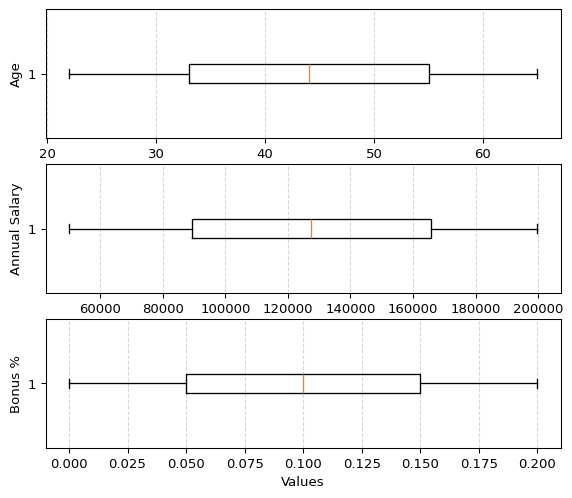

In [ ]:
#showing outliers
numeric_df = Employee_Exit_df.select_dtypes(include=['int64', 'float64'])

fig, axs = plt.subplots(len(numeric_df.columns), 1, figsize=(7, 2*len(numeric_df.columns)), dpi=95)


for i, col in enumerate(numeric_df.columns):
    axs[i].boxplot(numeric_df[col].dropna(), vert=False)
    axs[i].set_ylabel(col)
    axs[i].set_xlabel("Values")
    axs[i].grid(True, axis='x', linestyle='--', alpha=0.5)

plt.show()

In [ ]:
Employee_Exit_df.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E65246,Sarah Moses,Technical Architect,Finance,Customer Support,Female,Black,56.0,2008-06-18,96729.0,0.15,India,Bangalore,2013-01-03
1,E42782,Eric Smith,Engineer,Finance,Manufacturing,Female,Caucasian,46.0,2013-11-24,98803.0,0.20,China,Chongqing,2022-01-04
2,E25474,Kathryn Clark,Director,Finance,Sales,Female,Hispanic,27.0,2004-03-04,141682.0,0.10,Canada,Toronto,2012-04-19
3,E14123,Danielle Hill,Engineer,Marketing,Customer Support,Female,Hispanic,52.0,1994-01-23,184311.0,0.00,Germany,Berlin,2003-06-28
4,E47811,Kristi Davis,Engineer,Marketing,Research & Development,Male,Caucasian,52.0,1996-07-09,89195.0,0.15,United States,Chicago,2004-08-21


In [ ]:
# Create numeric column (Tenure in days)
Employee_Exit_df["Tenure"] = (Employee_Exit_df["Exit Date"] - Employee_Exit_df["Hire Date"]).dt.days
Employee_Exit_df.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,Tenure
0,E65246,Sarah Moses,Technical Architect,Finance,Customer Support,Female,Black,56.0,2008-06-18,96729.0,0.15,India,Bangalore,2013-01-03,1660
1,E42782,Eric Smith,Engineer,Finance,Manufacturing,Female,Caucasian,46.0,2013-11-24,98803.0,0.20,China,Chongqing,2022-01-04,2963
2,E25474,Kathryn Clark,Director,Finance,Sales,Female,Hispanic,27.0,2004-03-04,141682.0,0.10,Canada,Toronto,2012-04-19,2968
3,E14123,Danielle Hill,Engineer,Marketing,Customer Support,Female,Hispanic,52.0,1994-01-23,184311.0,0.00,Germany,Berlin,2003-06-28,3443
4,E47811,Kristi Davis,Engineer,Marketing,Research & Development,Male,Caucasian,52.0,1996-07-09,89195.0,0.15,United States,Chicago,2004-08-21,2965


In [ ]:
#drop unnecessary columns
drop_cols = ["EEID", "Full Name", "Country", "Exit Date", "Hire Date"]
Employee_Exit_df = Employee_Exit_df.drop(columns=[c for c in drop_cols if c in Employee_Exit_df.columns])

In [ ]:
Employee_Exit_df.head()

,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Annual Salary,Bonus %,City,Tenure
0,Technical Architect,Finance,Customer Support,Female,Black,56.0,96729.0,0.15,Bangalore,1660
1,Engineer,Finance,Manufacturing,Female,Caucasian,46.0,98803.0,0.20,Chongqing,2963
2,Director,Finance,Sales,Female,Hispanic,27.0,141682.0,0.10,Toronto,2968
3,Engineer,Marketing,Customer Support,Female,Hispanic,52.0,184311.0,0.00,Berlin,3443
4,Engineer,Marketing,Research & Development,Male,Caucasian,52.0,89195.0,0.15,Chicago,2965


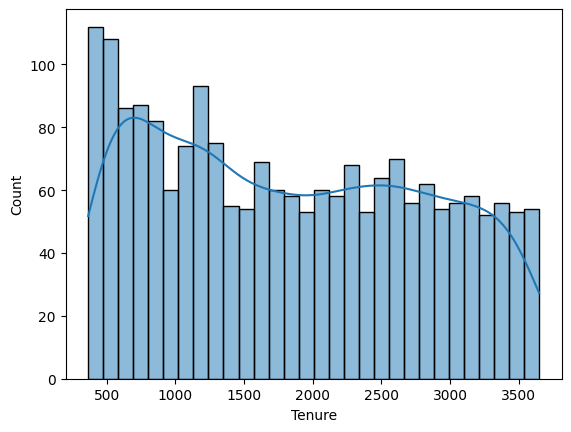

In [ ]:
#showing the distribution of the tenure data
sns.histplot(Employee_Exit_df['Tenure'], kde=True, bins=30)
plt.show()

In [ ]:
df = Employee_Exit_df.copy()

In [ ]:
#add new features
df['Tenure_years'] = df['Tenure'] / 365
df['Tenure_months'] = df['Tenure'] / 30
df['Tenure_days'] = df['Tenure']  # keep original


In [ ]:
#separate target and features
X = df.drop(columns=['Tenure'])
y = df['Tenure']

In [ ]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [ ]:
# Identify numerical and categorical columns
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
# Exclude 'City_encoded' from numerical columns for standard scaling
numeric_cols.remove('City_encoded')

# One-Hot Encode categorical features
categorical_cols = ['Department', 'Business Unit', 'Job Title', 'Gender', 'Ethnicity']
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[categorical_cols]).toarray()
X_test_encoded = encoder.transform(X_test[categorical_cols]).toarray()

# Create DataFrames from encoded categorical features
encoded_columns = encoder.get_feature_names_out(categorical_cols)
X_train_cat_df = pd.DataFrame(X_train_encoded, columns=encoded_columns, index=X_train.index)
X_test_cat_df = pd.DataFrame(X_test_encoded, columns=encoded_columns, index=X_test.index)

# Combine scaled numerical features, one-hot encoded categorical features, and the target encoded City column
X_train_final = pd.concat([
    X_train[numeric_cols].reset_index(drop=True),
    X_train_cat_df.reset_index(drop=True),
    X_train['City_encoded'].reset_index(drop=True) # Include the target encoded city column
], axis=1)

X_test_final = pd.concat([
    X_test[numeric_cols].reset_index(drop=True),
    X_test_cat_df.reset_index(drop=True),
    X_test['City_encoded'].reset_index(drop=True) # Include the target encoded city column
], axis=1)

In [ ]:
#training the model

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train_final, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
#evaluate
y_train_pred = xgb.predict(X_train_final)
y_test_pred = xgb.predict(X_test_final)

print("TRAINING METRICS")
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("MSE:", mean_squared_error(y_train, y_train_pred))
print("R²:", r2_score(y_train, y_train_pred))

print("\nTEST METRICS")
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("R²:", r2_score(y_test, y_test_pred))

TRAINING METRICS
MAE: 1.3958938121795654
MSE: 3.2614591121673584
R²: 0.999996542930603

TEST METRICS
MAE: 4.152578353881836
MSE: 29.021268844604492
R²: 0.9999704957008362


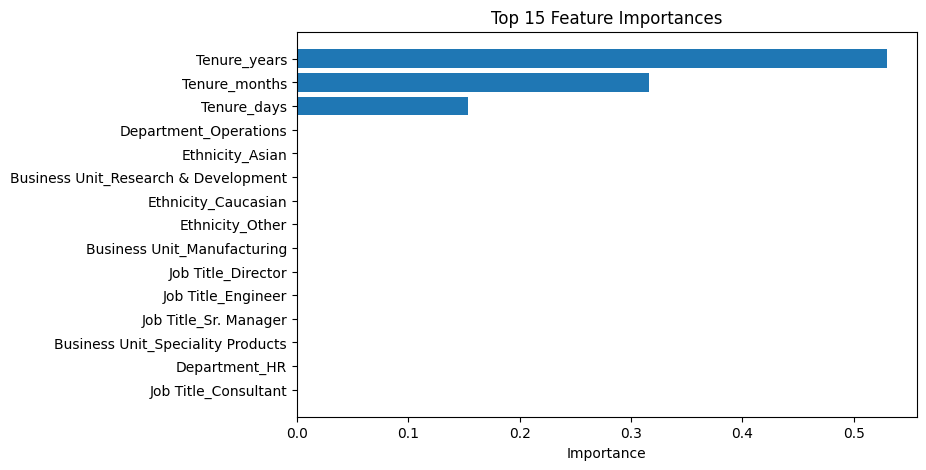

In [ ]:
#feature importance plot
import matplotlib.pyplot as plt
import pandas as pd

feature_importances = pd.DataFrame({
    'Feature': X_train_final.columns,
    'Importance': xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

top_features = feature_importances.head(15)
plt.figure(figsize=(8,5))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Top 15 Feature Importances")
plt.show()


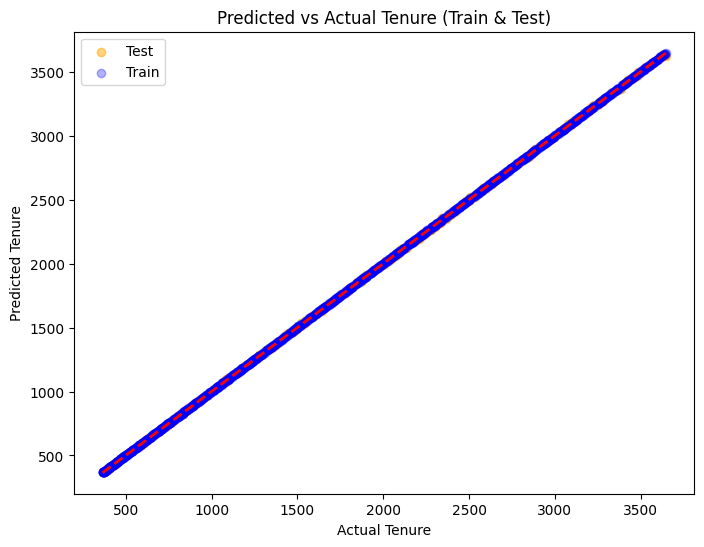

In [ ]:
#predicted vs actual plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, alpha=0.5, color='orange', label='Test')
plt.scatter(y_train, y_train_pred, alpha=0.3, color='blue', label='Train')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Tenure")
plt.ylabel("Predicted Tenure")
plt.title("Predicted vs Actual Tenure (Train & Test)")
plt.legend()
plt.show()

In [ ]:
print(list(X_train_final.columns))
print(X_train_final.dtypes)


['Age', 'Annual Salary', 'Bonus %', 'Tenure_years', 'Tenure_months', 'Tenure_days', 'Department_Finance', 'Department_HR', 'Department_IT', 'Department_Marketing', 'Department_Operations', 'Business Unit_Customer Support', 'Business Unit_Manufacturing', 'Business Unit_Research & Development', 'Business Unit_Sales', 'Business Unit_Speciality Products', 'Job Title_Analyst', 'Job Title_Consultant', 'Job Title_Director', 'Job Title_Engineer', 'Job Title_Sr. Manager', 'Job Title_Technical Architect', 'Gender_Female', 'Gender_Male', 'Ethnicity_Asian', 'Ethnicity_Black', 'Ethnicity_Caucasian', 'Ethnicity_Hispanic', 'Ethnicity_Other', 'City_encoded']
Age                                     float64
Annual Salary                           float64
Bonus %                                 float64
Tenure_years                            float64
Tenure_months                           float64
Tenure_days                               int64
Department_Finance                      float64
Department_HR

##Exit Date Prediction on the IT dataset

In [56]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from google.colab import files

In [ ]:
#Load Data

It_Employee_df = pd.read_csv("/content/Employee_Profile_IT.csv")
It_Employee_df.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,EmploymentRating,DaysOfAbsence,EducationLevel,CertificationsEarned
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55.0,4/8/2016,"$141,604",0.15,United States,Seattle,10/16/2021,5.0,2.0,Master's,2.0
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59.0,11/29/1997,"$99,975",0.00,China,Chongqing,NaN,10.0,8.0,Bachelor's,2.0
2,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26.0,9/27/2019,"$84,913",0.07,United States,Chicago,NaN,8.0,3.0,Bachelor's,2.0
3,E01550,Ruby Barnes,Manager,IT,Corporate,Female,Caucasian,27.0,7/1/2020,"$119,746",0.10,United States,Phoenix,NaN,7.0,13.0,Master's,0.0
4,E04116,David Barnes,NaN,IT,Corporate,Male,Caucasian,64.0,11/3/2013,"$186,503",0.24,United States,Columbus,NaN,8.0,8.0,Bachelor's,2.0


In [ ]:
It_Employee_df.describe()

,Age,Bonus %,EmploymentRating,DaysOfAbsence,CertificationsEarned
count,282.000000,282.000000,285.000000,285.000000,285.000000
mean,44.106383,0.057021,7.582456,7.961404,1.856140
std,10.672879,0.104209,1.733384,4.962030,1.410601
min,25.000000,0.000000,5.000000,0.000000,0.000000
25%,35.000000,0.000000,6.000000,4.000000,1.000000
50%,45.000000,0.000000,8.000000,8.000000,2.000000
75%,53.000000,0.090000,9.000000,12.000000,3.000000
max,65.000000,0.390000,10.000000,16.000000,4.000000


In [ ]:
It_Employee_df.info()
It_Employee_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EEID                  287 non-null    object 
 1   Full Name             284 non-null    object 
 2   Job Title             286 non-null    object 
 3   Department            287 non-null    object 
 4   Business Unit         285 non-null    object 
 5   Gender                287 non-null    object 
 6   Ethnicity             283 non-null    object 
 7   Age                   282 non-null    float64
 8   Hire Date             282 non-null    object 
 9   Annual Salary         282 non-null    object 
 10  Bonus %               282 non-null    float64
 11  Country               284 non-null    object 
 12  City                  284 non-null    object 
 13  Exit Date             22 non-null     object 
 14  EmploymentRating      285 non-null    float64
 15  DaysOfAbsence         2

,0
EEID,0
Full Name,3
Job Title,1
Department,0
Business Unit,2
Gender,0
Ethnicity,4
Age,5
Hire Date,5
Annual Salary,5


In [ ]:
#drop extra columns
cols_to_drop = ['EmploymentRating', 'DaysOfAbsence', 'EducationLevel', 'CertificationsEarned']
It_Employee_df = It_Employee_df.drop(columns=cols_to_drop, errors='ignore')

In [ ]:
#convert data types
It_Employee_df['Annual Salary'] = It_Employee_df['Annual Salary'].replace('[\$,]', '', regex=True).astype(float)
It_Employee_df['Hire Date'] = pd.to_datetime(It_Employee_df['Hire Date'], errors='coerce')
It_Employee_df['Exit Date'] = pd.to_datetime(It_Employee_df['Exit Date'], errors='coerce')


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-400314092.py:2: SyntaxWarning: invalid escape sequence '\$'
  It_Employee_df['Annual Salary'] = It_Employee_df['Annual Salary'].replace('[\$,]', '', regex=True).astype(float)


In [ ]:
It_Employee_df.columns

Index(['Job Title', 'Department', 'Business Unit', 'Gender', 'Ethnicity',
       'Age', 'Hire Date', 'Annual Salary', 'Bonus %', 'City', 'Exit Date'],
      dtype='object')

In [ ]:
# another columns need to be dropped
cols_to_drop = ['EEID', 'Full Name', 'Country']
It_Employee_df = It_Employee_df.drop(columns=cols_to_drop, errors='ignore')


In [ ]:
#handling missing values

numeric_cols = ['Age', 'Annual Salary', 'Bonus %']
for col in numeric_cols:
    It_Employee_df[col] = It_Employee_df[col].fillna(X_train_final[col].mean())


categorical_cols = ['Business Unit', 'Job Title', 'Ethnicity', 'City']
for col in categorical_cols:
    It_Employee_df[col] = It_Employee_df[col].fillna('Unknown')

In [ ]:
# calculate tenure

It_Employee_df['Tenure_days'] = (It_Employee_df['Exit Date'] - It_Employee_df['Hire Date']).dt.days
It_Employee_df['Tenure_years'] = It_Employee_df['Tenure_days'] / 365.25
It_Employee_df['Tenure_months'] = It_Employee_df['Tenure_days'] / 30.44

# Current tenure for active employees (no exit date)
today = pd.Timestamp.today()
It_Employee_df['CurrentTenure_days'] = np.where(
    It_Employee_df['Exit Date'].isna(),
    (today - It_Employee_df['Hire Date']).dt.days,
    np.nan
)

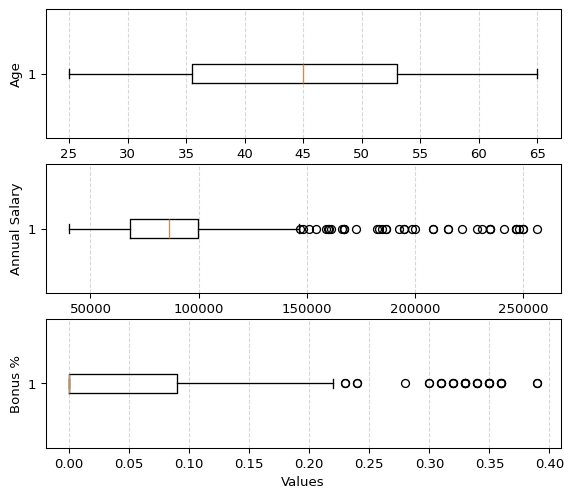

In [ ]:
# showing outliers
numeric_df = It_Employee_df.select_dtypes(include=['int64', 'float64'])

fig, axs = plt.subplots(len(numeric_df.columns), 1, figsize=(7, 2*len(numeric_df.columns)), dpi=95)


for i, col in enumerate(numeric_df.columns):
    axs[i].boxplot(numeric_df[col].dropna(), vert=False)
    axs[i].set_ylabel(col)
    axs[i].set_xlabel("Values")
    axs[i].grid(True, axis='x', linestyle='--', alpha=0.5)

plt.show()

In [ ]:
#handling outliers using capping
outlier_cols = ['Bonus %', 'Annual Salary']

for col in outlier_cols:
    lower = X_train_final[col].quantile(0.01)
    upper = X_train_final[col].quantile(0.99)

    It_Employee_df[col] = It_Employee_df[col].clip(lower, upper)

In [ ]:
#target encoding fot city
It_Employee_df['City_encoded'] = It_Employee_df['City'].map(city_means)
It_Employee_df['City_encoded'] = It_Employee_df['City_encoded'].fillna(y_train.mean())
new_data = It_Employee_df.drop(columns=['City'])


In [ ]:
#one hot encoding for other categorical features
categorical_cols = ['Department', 'Business Unit', 'Job Title', 'Gender', 'Ethnicity']

#load the encoder fitted on training data
encoder = joblib.load("onehot_encoder.pkl")

# Get the categorical columns from the training data used for fitting
encoder_categorical_cols = encoder.feature_names_in_

# Reorder the columns in It_Employee_df to match the encoder's fitted columns
It_Employee_df_reordered = It_Employee_df[encoder_categorical_cols]


X_It_encoded = encoder.transform(It_Employee_df_reordered)
encoded_columns = encoder.get_feature_names_out(encoder_categorical_cols)
X_It_cat_df = pd.DataFrame(X_It_encoded, columns=encoded_columns, index=It_Employee_df.index)

In [ ]:
#combine into final feature set
numeric_cols = ['Age', 'Annual Salary', 'Bonus %', 'Tenure_years', 'Tenure_months', 'Tenure_days']
X_It_final = pd.concat([
    It_Employee_df[numeric_cols].reset_index(drop=True), # Use original It_Employee_df for numeric columns
    X_It_cat_df.reset_index(drop=True),
    It_Employee_df['City_encoded'].reset_index(drop=True)
], axis=1)

# Make sure column order matches training set
trained_columns = joblib.load("trained_columns.pkl")
X_unseen_final = X_It_final.reindex(columns=trained_columns, fill_value=0)

In [ ]:
#load model
xgb_model = joblib.load("xgb_model.pkl")
unseen_predictions = xgb_model.predict(X_unseen_final)

# Add predictions back to dataset
It_Employee_df['Predicted_Tenure'] = unseen_predictions

#view results
print(It_Employee_df[['Hire Date', 'Exit Date', 'Predicted_Tenure']].head())

   Hire Date  Exit Date  Predicted_Tenure
0 2016-04-08 2021-10-16       2020.902222
1 1997-11-29        NaT       3631.195312
2 2019-09-27        NaT       3630.845215
3 2020-07-01        NaT       3634.378174
4 2013-11-03        NaT       3635.828857


In [ ]:
# Calculate actual tenure (only for rows with Exit Date)
It_Employee_df['Actual_Tenure'] = (It_Employee_df['Exit Date'] - It_Employee_df['Hire Date']).dt.days

# Display a few rows where we have actual tenure
print(It_Employee_df[['Hire Date', 'Exit Date', 'Actual_Tenure', 'Predicted_Tenure']].head(10))


   Hire Date  Exit Date  Actual_Tenure  Predicted_Tenure
0 2016-04-08 2021-10-16         2017.0       2020.902222
1 1997-11-29        NaT            NaN       3631.195312
2 2019-09-27        NaT            NaN       3630.845215
3 2020-07-01        NaT            NaN       3634.378174
4 2013-11-03        NaT            NaN       3635.828857
5 2012-01-09        NaT            NaN       3635.463379
6 2002-05-24        NaT            NaN       3634.093018
7 2012-05-11        NaT            NaN       3636.215576
8 2017-06-25        NaT            NaN       3633.514404
9 2014-02-11        NaT            NaN       3631.566406


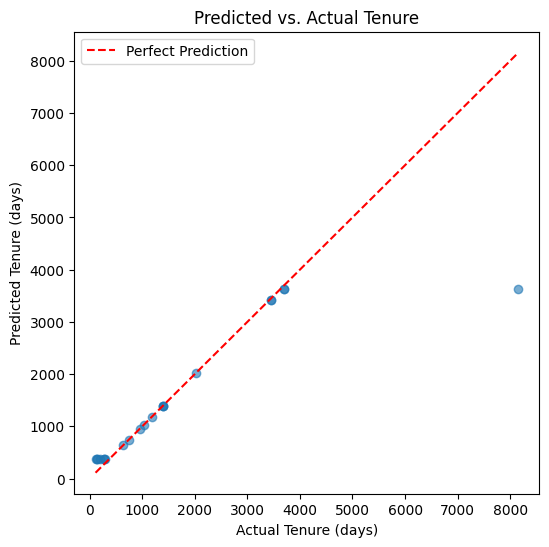

In [ ]:
import matplotlib.pyplot as plt

# Filter rows with actual tenure (for evaluation)
df_eval = It_Employee_df.dropna(subset=['Actual_Tenure'])

# Scatter plot: Predicted vs. Actual
plt.figure(figsize=(6,6))
plt.scatter(df_eval['Actual_Tenure'], df_eval['Predicted_Tenure'], alpha=0.6)
plt.plot([df_eval['Actual_Tenure'].min(), df_eval['Actual_Tenure'].max()],
         [df_eval['Actual_Tenure'].min(), df_eval['Actual_Tenure'].max()],
         color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual Tenure (days)")
plt.ylabel("Predicted Tenure (days)")
plt.title("Predicted vs. Actual Tenure")
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib # Import joblib

# ----------------------------
# 1. PREPROCESSING
# ----------------------------
df = Employee_Exit_df.copy()

# Convert tenure into years, months, days (new features) - Do this BEFORE splitting
df['Tenure_years'] = df['Tenure'] / 365
df['Tenure_months'] = df['Tenure'] / 30
df['Tenure_days'] = df['Tenure']  # keep original as well

# Separate features and target
X = df.drop(columns=['Tenure'])
y = df['Tenure']

# Split first (to avoid leakage in encoding)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Target encoding for City
city_means = y_train.groupby(X_train['City']).mean()
X_train['City_encoded'] = X_train['City'].map(city_means)
X_test['City_encoded'] = X_test['City'].map(city_means)
X_train.drop(columns=['City'], inplace=True)
X_test.drop(columns=['City'], inplace=True)


# One-hot encode remaining categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # Set sparse to False
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Save the encoder
joblib.dump(encoder, 'onehot_encoder.pkl')


# Combine encoded categorical features back with numerical ones
X_train_final = pd.concat(
    [X_train.drop(columns=categorical_cols).reset_index(drop=True),
     pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=X_train.index).reset_index(drop=True)], # Add index=X_train.index and reset_index
    axis=1
)

X_test_final = pd.concat(
    [X_test.drop(columns=categorical_cols).reset_index(drop=True),
     pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=X_test.index).reset_index(drop=True)], # Add index=X_test.index and reset_index
    axis=1
)

# Save the column order of the training data
joblib.dump(X_train_final.columns.tolist(), 'trained_columns.pkl')


# ----------------------------
# 2. TRAIN XGBOOST REGRESSOR
# ----------------------------
xgb = XGBRegressor(
    n_estimators=300,      # number of trees
    learning_rate=0.05,    # smaller learning rate for better generalization
    max_depth=6,          # depth of each tree
    subsample=0.8,        # random sampling of data for each tree
    colsample_bytree=0.8, # random sampling of features for each tree
    random_state=42
)

xgb.fit(X_train_final, y_train)

# Save the trained model
joblib.dump(xgb, 'xgb_model.pkl')


# ----------------------------
# 3. EVALUATE MODEL
# ----------------------------
y_pred = xgb.predict(X_test_final)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")

# ----------------------------
# 4. FEATURE IMPORTANCES
# ----------------------------
feature_importances = pd.DataFrame({
    'Feature': X_train_final.columns,
    'Importance': xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop 20 Features:")
print(feature_importances.head(20))

MAE: 4.162418842315674
MSE: 28.949125289916992
R²: 0.999970555305481

Top 20 Features:
                                 Feature  Importance
3                           Tenure_years    0.534281
4                          Tenure_months    0.321570
5                            Tenure_days    0.144036
17                 Department_Operations    0.000005
19           Business Unit_Manufacturing    0.000005
25                       Ethnicity_Asian    0.000005
14                         Department_HR    0.000005
7                      Job Title_Analyst    0.000004
18        Business Unit_Customer Support    0.000004
27                   Ethnicity_Caucasian    0.000004
1                          Annual Salary    0.000004
20  Business Unit_Research & Development    0.000004
21                   Business Unit_Sales    0.000004
22     Business Unit_Speciality Products    0.000004
29                       Ethnicity_Other    0.000004
15                         Department_IT    0.000004
9           

In [ ]:
#add the predicted exit date column

It_Employee_df['Hire Date'] = pd.to_datetime(It_Employee_df['Hire Date'], errors='coerce')

# Predict Exit Date by adding Predicted_Tenure (in days) to Hire Date
It_Employee_df['Predicted_Exit_Date'] = It_Employee_df['Hire Date'] + pd.to_timedelta(It_Employee_df['Predicted_Tenure'], unit='D')

# Display final dataframe with new column
It_Employee_df[['Hire Date', 'Predicted_Tenure', 'Predicted_Exit_Date']].head(10)


,Hire Date,Predicted_Tenure,Predicted_Exit_Date
0,2016-04-08,2020.902222,2021-10-19 21:39:11.953125
1,1997-11-29,3631.195312,2007-11-08 04:41:15.000000
2,2019-09-27,3630.845215,2029-09-04 20:17:06.562500
3,2020-07-01,3634.378174,2030-06-13 09:04:34.218750
4,2013-11-03,3635.828857,2023-10-17 19:53:33.281250
5,2012-01-09,3635.463379,2021-12-22 11:07:15.937500
6,2002-05-24,3634.093018,2012-05-05 02:13:56.718750
7,2012-05-11,3636.215576,2022-04-25 05:10:25.781250
8,2017-06-25,3633.514404,2027-06-06 12:20:44.531250
9,2014-02-11,3631.566406,2024-01-21 13:35:37.500000


In [ ]:
It_Employee_df['Predicted_Exit_Date'] = It_Employee_df['Predicted_Exit_Date'].dt.date

# Display cleaned result
It_Employee_df[['Hire Date', 'Predicted_Tenure', 'Predicted_Exit_Date']].head(10)

,Hire Date,Predicted_Tenure,Predicted_Exit_Date
0,2016-04-08,2020.902222,2021-10-19
1,1997-11-29,3631.195312,2007-11-08
2,2019-09-27,3630.845215,2029-09-04
3,2020-07-01,3634.378174,2030-06-13
4,2013-11-03,3635.828857,2023-10-17
5,2012-01-09,3635.463379,2021-12-22
6,2002-05-24,3634.093018,2012-05-05
7,2012-05-11,3636.215576,2022-04-25
8,2017-06-25,3633.514404,2027-06-06
9,2014-02-11,3631.566406,2024-01-21


In [ ]:
#download the file
It_Employee_df.to_csv("Employee_Profile_IT_with_Predicted_Exit.csv", index=False)

print("File saved successfully as 'Employee_Profile_IT_with_Predicted_Exit.csv'")

files.download("Employee_Profile_IT_with_Predicted_Exit.csv")


File saved successfully as 'Employee_Profile_IT_with_Predicted_Exit.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Training on Performance Bonus Dataset


In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor, plot_importance
from sklearn.preprocessing import StandardScaler



In [2]:
#read the file
Per_Bonus = pd.read_csv("/content/Performance_Bonus.csv")
Per_Bonus.head()

,PerformanceID,EmploymentRating,DaysOfAbsence,EducationLevel,CertificationsEarned,Bouns
0,1,10,2,Bachelor's,5,33%
1,2,10,0,Master's,5,31%
2,3,4,10,Doctorate,4,34%
3,4,9,0,Doctorate,3,27%
4,5,2,13,Doctorate,1,37%


In [3]:
#drop performance id

Per_Bonus = Per_Bonus.drop(columns=['PerformanceID'])

In [4]:
#data info
Per_Bonus.info()
Per_Bonus.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   EmploymentRating      1000 non-null   int64 
 1   DaysOfAbsence         1000 non-null   int64 
 2   EducationLevel        1000 non-null   object
 3   CertificationsEarned  1000 non-null   int64 
 4   Bouns                 1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


,0
EmploymentRating,0
DaysOfAbsence,0
EducationLevel,0
CertificationsEarned,0
Bouns,0


In [5]:
from os import rename
#update the data type of Bonus and rename this column with it's correct spelling

Per_Bonus = Per_Bonus.rename(columns={'Bouns': 'Bonus'})

Per_Bonus["Bonus"] = (Per_Bonus["Bonus"].str.replace('%', '', regex = False).astype(float) / 100)

In [6]:
Per_Bonus.head()

,EmploymentRating,DaysOfAbsence,EducationLevel,CertificationsEarned,Bonus
0,10,2,Bachelor's,5,0.33
1,10,0,Master's,5,0.31
2,4,10,Doctorate,4,0.34
3,9,0,Doctorate,3,0.27
4,2,13,Doctorate,1,0.37


In [7]:
Per_Bonus.nunique()

,0
EmploymentRating,10
DaysOfAbsence,17
EducationLevel,3
CertificationsEarned,6
Bonus,41


In [9]:
#the description of the data
Per_Bonus.describe()

,EmploymentRating,DaysOfAbsence,CertificationsEarned,Bonus
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.480000,7.974000,2.542000,0.201890
std,2.812385,4.872686,1.733563,0.119226
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,1.000000,0.100000
50%,5.000000,8.000000,3.000000,0.200000
75%,8.000000,12.000000,4.000000,0.310000
max,10.000000,16.000000,5.000000,0.400000


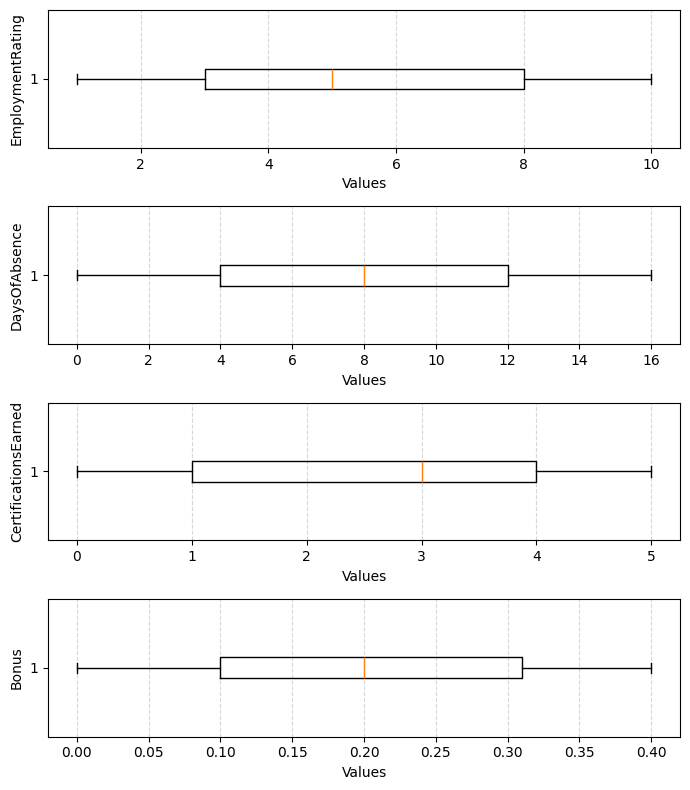

In [10]:
#showing the outliers

numeric_cols = Per_Bonus.select_dtypes(include=np.number).columns.tolist()
numeric_df = Per_Bonus[numeric_cols]

fig, axs = plt.subplots(len(numeric_df.columns), 1, figsize=(7, 2*len(numeric_df.columns)))
if len(numeric_df.columns) == 1:
    axs = [axs]

for i, col in enumerate(numeric_df.columns):
    axs[i].boxplot(numeric_df[col].dropna(), vert=False)
    axs[i].set_ylabel(col)
    axs[i].set_xlabel("Values")
    axs[i].grid(True, axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

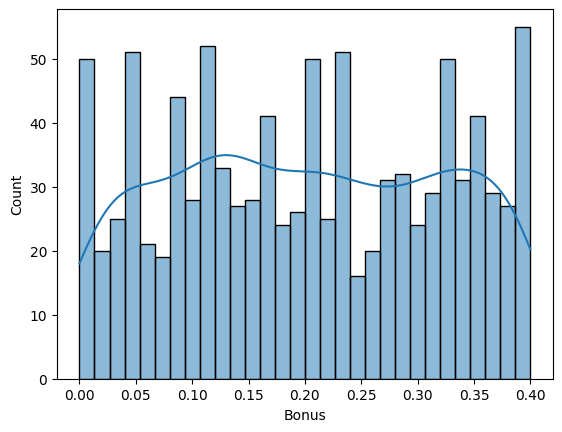

In [11]:
#show the distribution of the target column

sns.histplot(Per_Bonus['Bonus'], kde=True, bins=30)
plt.show()

In [12]:
#separate target from the features

X = Per_Bonus.drop(columns=['Bonus'])
y = Per_Bonus['Bonus']


In [13]:
#split the data into training and testing

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
#apply one hot encoding in the categorical feature [Education level]
encoder = OneHotEncoder(handle_unknown='ignore')

x_train_encoded = encoder.fit_transform(x_train[['EducationLevel']])
x_test_encoded = encoder.transform(x_test[['EducationLevel']])

#convert to data frame and combine with the numerical columns
encoded_cols = encoder.get_feature_names_out(['EducationLevel'])
x_train_encoded_df = pd.DataFrame(x_train_encoded.toarray(), columns=encoded_cols, index=x_train.index)
x_test_encoded_df = pd.DataFrame(x_test_encoded.toarray(), columns=encoded_cols, index=x_test.index)

x_train_final = pd.concat([x_train.drop(columns=['EducationLevel']), x_train_encoded_df], axis=1)
x_test_final = pd.concat([x_test.drop(columns=['EducationLevel']), x_test_encoded_df], axis=1)



In [15]:
x_train_final.head()

,EmploymentRating,DaysOfAbsence,CertificationsEarned,EducationLevel_Bachelor's,EducationLevel_Doctorate,EducationLevel_Master's
29,6,13,0,0.0,1.0,0.0
535,4,9,4,1.0,0.0,0.0
695,5,9,5,0.0,1.0,0.0
557,8,0,3,1.0,0.0,0.0
836,3,12,3,0.0,1.0,0.0


In [16]:
# Numeric transformations
x_train_final['DaysOfAbsence_squared'] = x_train_final['DaysOfAbsence'] ** 2
x_train_final['SkillPerformance'] = x_train_final['CertificationsEarned'] * x_train_final['EmploymentRating']

# Weighted education * certifications
x_train_final['Education_WeightedCert'] = (
    x_train_final["EducationLevel_Bachelor\'s"]*1 +
    x_train_final["EducationLevel_Master\'s"]*2 +
    x_train_final["EducationLevel_Doctorate"]*3
) * x_train_final['CertificationsEarned']


# Aggregates
x_train_final['PerformanceScore'] = x_train_final['EmploymentRating'] + x_train_final['CertificationsEarned']
x_train_final['WeightedScore'] = x_train_final['EmploymentRating']*2 + x_train_final['CertificationsEarned']

# Advanced degree binary
x_train_final['IsAdvancedDegree'] = x_train_final["EducationLevel_Master's"] + x_train_final["EducationLevel_Doctorate"]


In [17]:
# Numeric transformations
x_test_final['DaysOfAbsence_squared'] = x_test_final['DaysOfAbsence'] ** 2
x_test_final['SkillPerformance'] = x_test_final['CertificationsEarned'] * x_test_final['EmploymentRating']

# Weighted education * certifications
x_test_final['Education_WeightedCert'] = (
    x_test_final["EducationLevel_Bachelor\'s"]*1 +
    x_test_final["EducationLevel_Master\'s"]*2 +
    x_test_final["EducationLevel_Doctorate"]*3
) * x_test_final['CertificationsEarned']

# Aggregates
x_test_final['PerformanceScore'] = x_test_final['EmploymentRating'] + x_test_final['CertificationsEarned']
x_test_final['WeightedScore'] = x_test_final['EmploymentRating']*2 + x_test_final['CertificationsEarned']

# Advanced degree binary
x_test_final['IsAdvancedDegree'] = x_test_final["EducationLevel_Master's"] + x_test_final["EducationLevel_Doctorate"]


In [18]:
x_test_final.head()

,EmploymentRating,DaysOfAbsence,CertificationsEarned,EducationLevel_Bachelor's,EducationLevel_Doctorate,EducationLevel_Master's,DaysOfAbsence_squared,SkillPerformance,Education_WeightedCert,PerformanceScore,WeightedScore,IsAdvancedDegree
521,8,1,2,1.0,0.0,0.0,1,16,2.0,10,18,0.0
737,9,11,3,1.0,0.0,0.0,121,27,3.0,12,21,0.0
740,6,15,3,0.0,0.0,1.0,225,18,6.0,9,15,1.0
660,10,5,5,0.0,1.0,0.0,25,50,15.0,15,25,1.0
411,6,15,2,1.0,0.0,0.0,225,12,2.0,8,14,0.0


In [19]:
x_train_final.head()

,EmploymentRating,DaysOfAbsence,CertificationsEarned,EducationLevel_Bachelor's,EducationLevel_Doctorate,EducationLevel_Master's,DaysOfAbsence_squared,SkillPerformance,Education_WeightedCert,PerformanceScore,WeightedScore,IsAdvancedDegree
29,6,13,0,0.0,1.0,0.0,169,0,0.0,6,12,1.0
535,4,9,4,1.0,0.0,0.0,81,16,4.0,8,12,0.0
695,5,9,5,0.0,1.0,0.0,81,25,15.0,10,15,1.0
557,8,0,3,1.0,0.0,0.0,0,24,3.0,11,19,0.0
836,3,12,3,0.0,1.0,0.0,144,9,9.0,6,9,1.0


In [38]:
#normalization

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(x_train_final)
X_test_scaled = scaler.transform(x_test_final)


In [39]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=10,
    max_depth=4,
    random_state=42
)

rf.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=4, n_estimators=10, random_state=42)

In [40]:
y_pred = rf.predict(X_train_scaled)


In [42]:
from sklearn.metrics import mean_absolute_error, r2_score

# Predict on the test set
y_pred = rf.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.3f}, R²: {r2:.3f}")

MAE: 0.103, R²: 0.001


Correlations with Bonus:
Bonus                        1.000000
Education_WeightedCert       0.065359
IsAdvancedDegree             0.053252
EducationLevel_Doctorate     0.046986
CertificationsEarned         0.035644
SkillPerformance             0.018943
EducationLevel_Master's      0.005555
DaysOfAbsence               -0.006240
DaysOfAbsence_squared       -0.006736
PerformanceScore            -0.018378
WeightedScore               -0.031303
EmploymentRating            -0.044454
EducationLevel_Bachelor's   -0.053252
Name: Bonus, dtype: float64


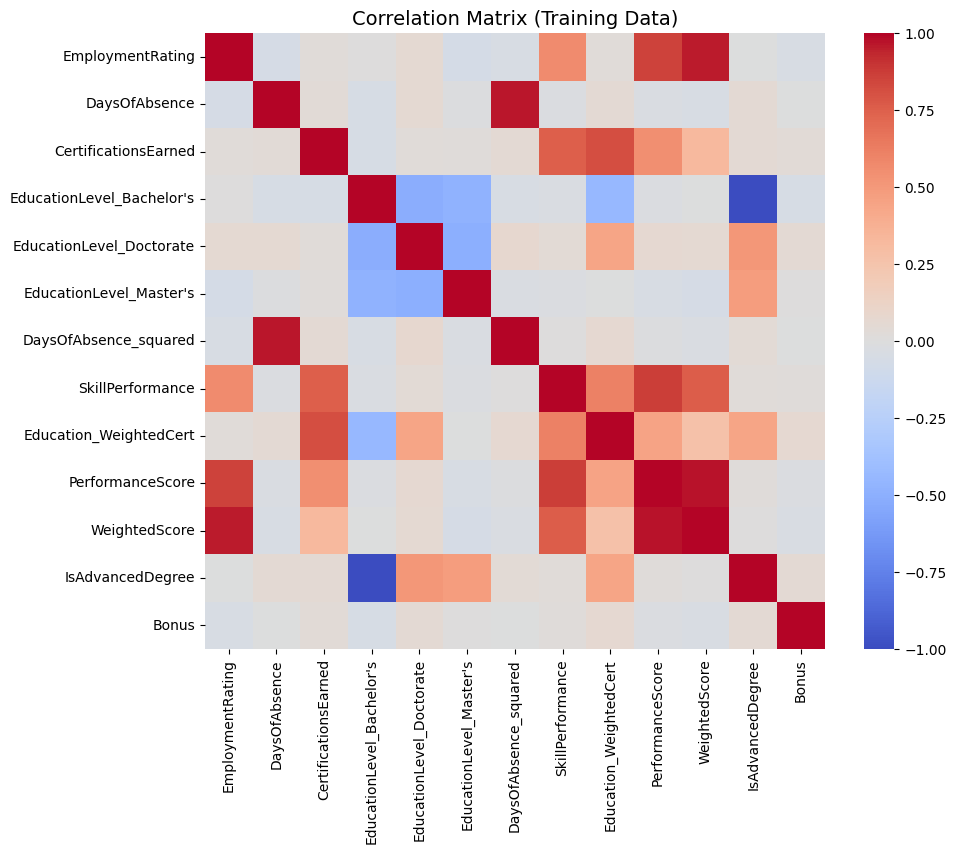

In [55]:
#correlation matrix

df_corr = x_train_final.copy()
df_corr['Bonus'] = y_train.reset_index(drop=True)

corr_matrix = df_corr.corr()

# Show only correlations with Bonus
bonus_corr = corr_matrix['Bonus'].sort_values(ascending=False)
print("Correlations with Bonus:")
print(bonus_corr)

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Matrix (Training Data)", fontsize=14)
plt.show()

In [53]:
#training the model

xgb = XGBRegressor(
    n_estimators=150,
    learning_rate=0.03,
    max_depth=2,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.03, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=150,
             n_jobs=None, num_parallel_tree=None, ...)

In [54]:
#evaluate
y_train_pred = xgb.predict(X_train_scaled)
y_test_pred = xgb.predict(X_test_scaled)

print("TRAINING METRICS")
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("MSE:", mean_squared_error(y_train, y_train_pred))
print("R²:", r2_score(y_train, y_train_pred))

print("\nTEST METRICS")
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("R²:", r2_score(y_test, y_test_pred))

TRAINING METRICS
MAE: 0.09867604661658406
MSE: 0.01302668248340908
R²: 0.07489058583267283

TEST METRICS
MAE: 0.10478623059988021
MSE: 0.014818936174357044
R²: -0.015002754256120188


##Predict Bonus on the It dataset


In [109]:
#read the dataset

IT_df = pd.read_csv("/content/Employee_Profile_IT.csv")
IT_df.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,EmploymentRating,DaysOfAbsence,EducationLevel,CertificationsEarned
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55.0,4/8/2016,"$141,604",0.15,United States,Seattle,10/16/2021,5.0,2.0,Master's,2.0
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59.0,11/29/1997,"$99,975",0.00,China,Chongqing,NaN,10.0,8.0,Bachelor's,2.0
2,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26.0,9/27/2019,"$84,913",0.07,United States,Chicago,NaN,8.0,3.0,Bachelor's,2.0
3,E01550,Ruby Barnes,Manager,IT,Corporate,Female,Caucasian,27.0,7/1/2020,"$119,746",0.10,United States,Phoenix,NaN,7.0,13.0,Master's,0.0
4,E04116,David Barnes,NaN,IT,Corporate,Male,Caucasian,64.0,11/3/2013,"$186,503",0.24,United States,Columbus,NaN,8.0,8.0,Bachelor's,2.0


In [110]:
#drop unnecessary columns

IT_df = IT_df.drop(columns=['EEID', 'Full Name', 'Job Title', 'Department', 'Business Unit', 'Gender', 'Ethnicity',
                                             'Age', 'Hire Date', 'Annual Salary', 'Country', 'City'])

IT_df.drop(columns = ['Exit Date'], inplace= True)

In [111]:
IT_df.head()

,Bonus %,EmploymentRating,DaysOfAbsence,EducationLevel,CertificationsEarned
0,0.15,5.0,2.0,Master's,2.0
1,0.00,10.0,8.0,Bachelor's,2.0
2,0.07,8.0,3.0,Bachelor's,2.0
3,0.10,7.0,13.0,Master's,0.0
4,0.24,8.0,8.0,Bachelor's,2.0


In [112]:
IT_df.info()
IT_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Bonus %               282 non-null    float64
 1   EmploymentRating      285 non-null    float64
 2   DaysOfAbsence         285 non-null    float64
 3   EducationLevel        285 non-null    object 
 4   CertificationsEarned  285 non-null    float64
dtypes: float64(4), object(1)
memory usage: 11.3+ KB


,0
Bonus %,5
EmploymentRating,2
DaysOfAbsence,2
EducationLevel,2
CertificationsEarned,2


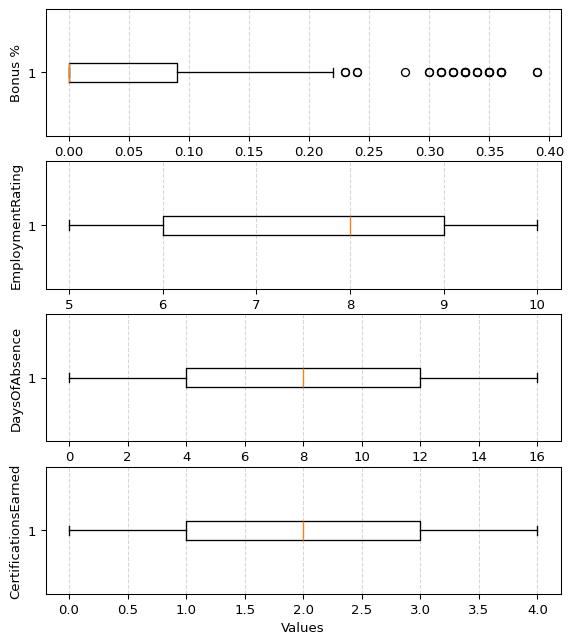

In [113]:
# showing outliers
numeric_df = IT_df.select_dtypes(include=['int64', 'float64'])

fig, axs = plt.subplots(len(numeric_df.columns), 1, figsize=(7, 2*len(numeric_df.columns)), dpi=95)


for i, col in enumerate(numeric_df.columns):
    axs[i].boxplot(numeric_df[col].dropna(), vert=False)
    axs[i].set_ylabel(col)
    axs[i].set_xlabel("Values")
    axs[i].grid(True, axis='x', linestyle='--', alpha=0.5)

plt.show()

In [114]:
#rename [Bonus] column

IT_df = IT_df.rename(columns={'Bonus %': 'Bonus'})

In [115]:
#handle missing value

IT_df = IT_df.dropna(subset=['Bonus'])

IT_df['EmploymentRating'] = IT_df['EmploymentRating'].fillna(IT_df['EmploymentRating'].mean())

IT_df['DaysOfAbsence'] = IT_df['DaysOfAbsence'].fillna(0)

IT_df['EducationLevel'] = IT_df['EducationLevel'].fillna("Unknown")

IT_df['CertificationsEarned'] = IT_df['CertificationsEarned'].fillna(0)


In [116]:
IT_df.isnull().sum()

,0
Bonus,0
EmploymentRating,0
DaysOfAbsence,0
EducationLevel,0
CertificationsEarned,0


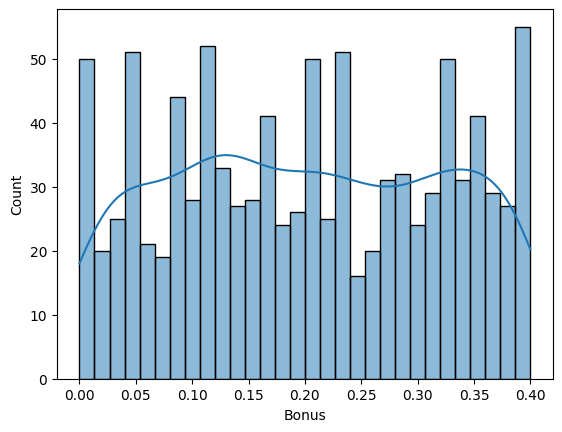

In [117]:
#show the distibution of the target column
sns.histplot(Per_Bonus['Bonus'], kde=True, bins=30)
plt.show()

In [118]:
#apply one hot encoding
IT_df = pd.get_dummies(IT_df, columns=['EducationLevel'], drop_first=False)



In [119]:
#add all the features that we did in the feature engineering step

IT_df['DaysOfAbsence_squared'] = IT_df['DaysOfAbsence'] ** 2
IT_df['PerformanceScore'] = IT_df['EmploymentRating'] / 5
IT_df['RatingPerAbsence'] = IT_df['EmploymentRating'] / (IT_df['DaysOfAbsence'] + 1)
IT_df['IsAdvancedDegree'] = IT_df[['EducationLevel_Master\'s','EducationLevel_Doctorate']].sum(axis=1) if 'EducationLevel_Master\'s' in IT_df.columns and 'EducationLevel_Doctorate' in IT_df.columns else 0
IT_df['CertPerAbsence'] = IT_df['CertificationsEarned'] / (IT_df['DaysOfAbsence'] + 1)
IT_df['Education_WeightedCert'] = (
    IT_df.get('EducationLevel_Bachelor\'s', 0)*1 +
    IT_df.get('EducationLevel_Master\'s', 0)*2 +
    IT_df.get('EducationLevel_Doctorate', 0)*3
) * IT_df['CertificationsEarned']
IT_df['WeightedScore'] = IT_df['EmploymentRating'] * 0.7 + IT_df['CertificationsEarned'] * 0.3
IT_df['SkillPerformance'] = IT_df['CertificationsEarned'] * IT_df['EmploymentRating']



In [120]:
It_df.head(10)

,EmploymentRating,DaysOfAbsence,CertificationsEarned,EducationLevel_Bachelor's,EducationLevel_Doctorate,EducationLevel_Master's,DaysOfAbsence_squared,SkillPerformance,Education_WeightedCert,PerformanceScore,WeightedScore,IsAdvancedDegree,Predicted_bonus
0,5.0,2.0,2.0,False,0,True,4.0,10.0,4.0,1.0,4.1,1,0.270279
1,10.0,8.0,2.0,True,0,False,64.0,20.0,2.0,2.0,7.6,0,0.298244
2,8.0,3.0,2.0,True,0,False,9.0,16.0,2.0,1.6,6.2,0,0.325780
3,7.0,13.0,0.0,False,0,True,169.0,0.0,0.0,1.4,4.9,1,0.263727
4,8.0,8.0,2.0,True,0,False,64.0,16.0,2.0,1.6,6.2,0,0.325780
5,7.0,10.0,2.0,True,0,False,100.0,14.0,2.0,1.4,5.5,0,0.325780
6,8.0,12.0,0.0,False,0,True,144.0,0.0,0.0,1.6,5.6,1,0.263727
7,10.0,5.0,4.0,False,0,True,25.0,40.0,8.0,2.0,8.2,1,0.284644
8,6.0,1.0,1.0,True,0,False,1.0,6.0,1.0,1.2,4.5,0,0.270828
9,8.0,13.0,4.0,True,0,False,169.0,32.0,4.0,1.6,6.8,0,0.325780


In [121]:
#save Bonus before indexing
IT_actual_bonus = IT_df['Bonus'].copy()


In [122]:
#align column with training data
IT_df = IT_df.reindex(columns=x_train_final.columns, fill_value=0)


In [123]:
IT_scaled = scaler.transform(IT_df)

In [124]:
#predict Bonus

IT_pred = rf.predict(IT_scaled)
IT_df['Predicted_bonus'] = IT_pred

In [125]:
under_rewarded = (IT_actual_bonus < IT_df['Predicted_bonus']).sum()
print(f"Number of under-rewarded employees: {under_rewarded}")

Number of under-rewarded employees: 247


Some employees might be under rewarded, as the model predicts bonuses based on measurable factors such as performance ratings, education, and certifications all of which are closely related to bonus allocation.

In [126]:
#save the new dataset with the predicted Bonus

IT_df['Bonus'] = IT_actual_bonus
IT_df.to_csv("IT_dataset_with_predictions.csv", index=False)
print("Predictions saved to IT_dataset_with_predictions.csv")

Predictions saved to IT_dataset_with_predictions.csv


In [127]:
#download the file
from google.colab import files
files.download("IT_dataset_with_predictions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>